In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import json
import os

## Create Features

In [4]:
print(os.getcwd())
basePath = os.path.dirname(os.path.abspath('train.json'))
feature = pd.read_json(os.path.join(basePath, 'train.json') )
feature ["num_photos"] = feature ["photos"].apply(len)
feature ["num_features"] = feature ["features"].apply(len)
feature ["num_description_words"] = feature ["description"].apply(lambda x: len(x.split(" ")))
feature ["created"] = pd.to_datetime(feature["created"])
feature ["created_year"] = feature ["created"].dt.year
feature ["created_month"] = feature ["created"].dt.month
feature ["created_day"] = feature ["created"].dt.day

/Users/yanyan/Desktop/NEU/Fall 2022/5100 ai/Project/GP


In [5]:

feature_using = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
                   "num_photos", "num_features", "num_description_words",
                   "created_year", "created_month", "created_day"]
print(feature_using)

['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'num_photos', 'num_features', 'num_description_words', 'created_year', 'created_month', 'created_day']


<AxesSubplot:>

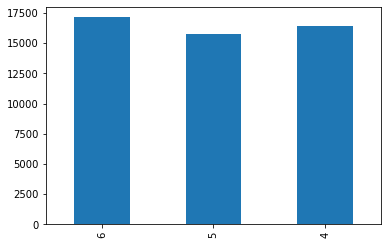

In [6]:
feature['created'].dt.month.value_counts(sort=False).plot(kind='bar')

In [7]:
new_feature = preprocessing.LabelEncoder()
new_feature.fit(list(feature['manager_id'].values))
feature['manager_id'] = new_feature.transform(list(feature['manager_id'].values))

### Adding manager_id to features

In [8]:
feature_using.extend(['manager_id'])
rental = feature[feature_using]
print(rental.head())

    bathrooms  bedrooms  latitude  longitude  price  num_photos  num_features  \
4         1.0         1   40.7108   -73.9539   2400          12             7   
6         1.0         2   40.7513   -73.9722   3800           6             6   
9         1.0         2   40.7575   -73.9625   3495           6             6   
10        1.5         3   40.7145   -73.9425   3000           5             0   
15        1.0         0   40.7439   -73.9743   2795           4             4   

    num_description_words  created_year  created_month  created_day  \
4                      77          2016              6           16   
6                     131          2016              6            1   
9                     119          2016              6           14   
10                     95          2016              6           24   
15                     41          2016              6           28   

    manager_id  
4         2192  
6         2044  
9         2748  
10        1239  
1

### Adding manager_skill as feature

In [9]:
X = feature[feature_using]
Y = feature['interest_level']

temp = pd.concat([X.manager_id, pd.get_dummies(Y)], axis=1).groupby('manager_id').mean()
temp['count'] = X.groupby('manager_id').count().iloc[:,1]

temp['manager_skill'] = temp['high']*2 + temp['medium']

unranked_managers_ixes = temp['count']<20

ranked_managers_ixes = ~unranked_managers_ixes

mean_values = temp.loc[ranked_managers_ixes, ['high','low','medium','manager_skill']].mean()
print(mean_values)
temp.loc[unranked_managers_ixes,['high','low','medium','manager_skill']] = mean_values.values

temp['managers_id'] = temp.index
joined = pd.merge(rental, temp,on='manager_id')
print(joined)

high             0.081314
low              0.673194
medium           0.245492
manager_skill    0.408120
dtype: float64
       bathrooms  bedrooms  latitude  longitude  price  num_photos  \
0            1.0         1   40.7108   -73.9539   2400          12   
1            2.0         2   40.7327   -73.8638   3385          18   
2            1.0         2   40.7039   -73.9425   2400          10   
3            1.0         1   40.7677   -73.9251   2350          17   
4            1.0         3   40.6907   -73.9216   3850           8   
...          ...       ...       ...        ...    ...         ...   
49347        1.5         2   40.6769   -73.9621   3399           4   
49348        3.5         3   40.7644   -73.9580  17000          11   
49349        1.0         0   40.6498   -73.9612   1300           1   
49350        2.0         3   40.7003   -73.9398   2795           9   
49351        1.0         1   40.7359   -74.0042   3600           4   

       num_features  num_description_wor

## Show top_five ommon features

In [10]:
train = pd.read_json("train.json")
all_features = []
for i in train['features']:
    all_features += i
    all_features = [x.strip().lower() for x in all_features]
all_features = sorted(all_features)

In [11]:
import collections

counter=collections.Counter(all_features)

In [12]:
common_features = pd.DataFrame(counter.most_common(), columns=['features', 'quantity'])
print(commonFeatures.shape)
common_features = commonFeatures.loc[:40, :]
common_features.plot(kind='bar')

NameError: name 'commonFeatures' is not defined

In [ ]:
common_features.head()